# 11 Método de Holt-Winters aditivo

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# importamos los datos en un dataframe
dataframe=pd.read_csv("dataframe_HW.csv",header=0)

In [3]:
#definimos una función que formatea nuestro df
def prepararDf(dataframe):
    df=dataframe.copy()
    df.index+=1
    df.columns = ['periodo','Y(t)']
    df['t'] = df.index
    #print(df.head)
    return df

df=prepararDf(dataframe)
df.head()

,periodo,Y(t),t
1,ene-81,23.105,1
2,feb-81,23.110,2
3,mar-81,21.759,3
4,abr-81,22.073,4
5,may-81,21.937,5


# Método

In [4]:
#Función del formato de tabla del método
def calcularValoresHoltWintersAditivo(dataframe,periodo,alfa=0.5,beta=0.3,gama=0.2):
    df = dataframe.copy()
    L=periodo

    # Preparación de columnas
    df['A(t)'] = np.NaN
    df['T(t)'] = np.NaN
    df['S(t)'] = np.NaN

    # Datos iniciales
    # Cálculo A(L)
    AL = (1/L)*df.loc[1:L,'Y(t)'].sum()
    df.loc[L,'A(t)']=AL

    
    #Valores de S(t)
    for t in range(1,L+1):
        Yt=df.loc[t,'Y(t)']
        St=Yt-AL

        df.loc[t,'S(t)']=St
    
    # Cálculo T(L)
    TL=(1/L)*(df.loc[L+1:L+L,'Y(t)'].sum()-df.loc[1:L,'Y(t)'].sum())/L
    df.loc[L,'T(t)'] = TL

    
    inicio = L+1
    final= df.shape[0]+1
    # Cálcular valores desde renglon 1 hasta renglon final(n-L) 
    for t in range(inicio, final,1):
        Yt = df.loc[t, 'Y(t)']
        St_L = df.loc[t-L, 'S(t)']

        # cálculo A(t)
        At_1 = df.loc[t-1, 'A(t)']
        Tt_1 = df.loc[t-1, 'T(t)']
        At = alfa*(Yt-St_L) + (1-alfa)*(At_1+Tt_1)
        df.loc[t, 'A(t)'] = At

        # cálculo T(t)
        Tt = beta*(At - At_1) + (1 - beta)*Tt_1
        df.loc[t, "T(t)"] = Tt

        # cálculo S(t)
        St = gama*(Yt-At) + (1-gama)*St_L
        df.loc[t, 'S(t)'] = St

    ''''''
    #print(df.loc[1-L, 'S(t)'])
    return df

df2=calcularValoresHoltWintersAditivo(df,12)
df2.head(14)

,periodo,Y(t),t,A(t),T(t),S(t)
1,ene-81,23.105,1,NaN,NaN,0.681667
2,feb-81,23.110,2,NaN,NaN,0.686667
3,mar-81,21.759,3,NaN,NaN,-0.664333
4,abr-81,22.073,4,NaN,NaN,-0.350333
5,may-81,21.937,5,NaN,NaN,-0.486333
6,jun-81,20.035,6,NaN,NaN,-2.388333
7,jul-81,23.590,7,NaN,NaN,1.166667
8,ago-81,21.672,8,NaN,NaN,-0.751333
9,sep-81,22.222,9,NaN,NaN,-0.201333
10,oct-81,22.123,10,NaN,NaN,-0.300333


In [5]:
#Funcion de pronostico
def pronosticoHoltWintersAditivo(dataframe,periodo):
    df = dataframe.copy()
    df['p'] = np.NaN
    df['F(t+p)'] = np.NaN
    L=periodo

    inicio=L
    final = df.shape[0]+1
    #df.loc[1:final,'p'] = 1 # inicia p en 1
    # ciclo de pronostico para los renglones con valor en Y(t) 
    for t in range(inicio,final): 
        At = df.loc[t, 'A(t)']
        p = 1 
        df.loc[t, 'p']=1
        Tt = df.loc[t,'T(t)']
        St_Lp = df.loc[t-L+1,'S(t)'] 

        Ftp = At + p*Tt + St_Lp

        df.loc[t+p, 'F(t+p)'] = Ftp
    
    #Inicio de ciclo para pronosticar tiempos adelante
    At = df.loc[t, 'A(t)']
    Tt = df.loc[t,'T(t)']
    St_Lp = df.loc[t-L+1,'S(t)']

    #print(t)
    for t in range(final, final+L-1):
        p = df.loc[t-1,'p'] + 1
        df.loc[t,'p'] = p
        St_Lp = df.loc[t-L+1,'S(t)']
        Ftp = (At + p*Tt)+St_Lp

        df.loc[t+1, 'F(t+p)'] = Ftp


        df.loc[t,'t'] = df.loc[t-1,'t']+1        
    #adicional
    df.loc[t+1,'t'] = df.loc[t,'t']+1
        
    return df

df3=pronosticoHoltWintersAditivo(df2,12)
df3.tail(20)

,periodo,Y(t),t,A(t),T(t),S(t),p,F(t+p)
101,may-89,26.217,101.0,27.012390,-0.008931,-0.514365,1.0,26.919563
102,jun-89,24.218,102.0,26.596759,-0.130941,-2.053398,1.0,25.031401
103,jul-89,27.914,103.0,26.668976,-0.069994,1.082497,1.0,27.507682
104,ago-89,26.975,104.0,27.160976,0.098604,-0.635571,1.0,25.851012
105,sep-89,28.527,105.0,27.825468,0.268371,0.248822,1.0,27.395225
106,oct-89,27.139,106.0,27.648542,0.134782,-0.153305,1.0,28.029593
107,nov-89,28.982,107.0,27.656929,0.096863,1.426187,1.0,29.234790
108,dic-89,28.169,108.0,27.431947,0.000310,0.994529,1.0,28.812690
109,NaN,NaN,109.0,NaN,NaN,NaN,2.0,27.878849
110,NaN,NaN,110.0,NaN,NaN,NaN,3.0,27.962213


# Errores

In [6]:
def calcularErrores(dataframe):
    df = dataframe.copy()
    df['e(t)'] = np.NaN
    df['|e(t)|'] = np.NaN
    df['e(t)^2'] = np.NaN
    df['|e(t)|/Y(t)'] = np.NaN

    inicio=df['F(t+p)'].first_valid_index()
    final=df['Y(t)'].last_valid_index()+1

    for i in range(inicio,final):
        Yt = df.loc[i]['Y(t)']
        pron = df.loc[i]['F(t+p)']
        et = Yt - pron
        et_abs = np.abs(et)

        df.loc[i, 'e(t)'] = et
        df.loc[i, '|e(t)|'] = et_abs
        df.loc[i, 'e(t)^2'] = et**2
        df.loc[i, '|e(t)|/Y(t)'] = et_abs/Yt

    errores = {
    'DAM': np.mean(df['|e(t)|']),
    'EMC': np.mean(df['e(t)^2']),
    'PEMA': np.mean(df['|e(t)|/Y(t)'])*100,
    }
    df_errores = pd.DataFrame(errores,index=['Errores:'])
    return df,df_errores

df4,df_errores=calcularErrores(df3)
print(df4.tail(14))
print(df_errores.head())

    periodo    Y(t)      t       A(t)      T(t)      S(t)     p     F(t+p)  \
107  nov-89  28.982  107.0  27.656929  0.096863  1.426187   1.0  29.234790   
108  dic-89  28.169  108.0  27.431947  0.000310  0.994529   1.0  28.812690   
109     NaN     NaN  109.0        NaN       NaN       NaN   2.0  27.878849   
110     NaN     NaN  110.0        NaN       NaN       NaN   3.0  27.962213   
111     NaN     NaN  111.0        NaN       NaN       NaN   4.0  26.366541   
112     NaN     NaN  112.0        NaN       NaN       NaN   5.0  27.146582   
113     NaN     NaN  113.0        NaN       NaN       NaN   6.0  26.919130   
114     NaN     NaN  114.0        NaN       NaN       NaN   7.0  25.380407   
115     NaN     NaN  115.0        NaN       NaN       NaN   8.0  28.516612   
116     NaN     NaN  116.0        NaN       NaN       NaN   9.0  26.798853   
117     NaN     NaN  117.0        NaN       NaN       NaN  10.0  27.683556   
118     NaN     NaN  118.0        NaN       NaN       NaN  11.0 

# Gráfica

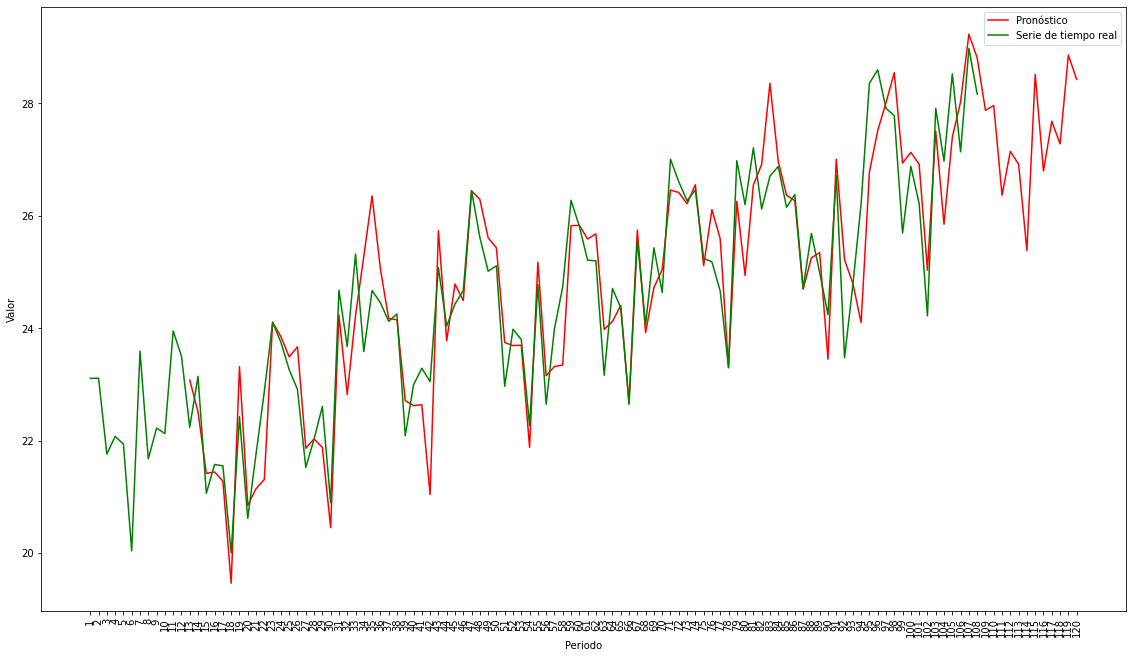

In [7]:
def pintarGrafico(dataframe,ancho=1400,alto=800):
    df=dataframe
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.subplots(figsize=(ancho*px, alto*px))

    # Labels (etiquetas) de ejes x, y
    plt.ylabel('Valor')
    plt.xlabel('Periodo')

    # Puntos, pares ordenados que se calcularon como pronóstico
    plt.plot(
        df['t'], df['F(t+p)'], '-',
        label='Pronóstico',
        color='r'
    )

    # Puntos, pares ordenados que se proporcionaron como datos muestra
    plt.plot(
        df['t'], df['Y(t)'], '-',
        label='Serie de tiempo real',
        color='g'
    )
    
    plt.legend(loc='best')
    plt.xticks(df.index,rotation=90)
    plt.show()

pintarGrafico(df4)

# Pronosticos en las series de tiempo del proyecto:

In [8]:
#Función para ejecutar método en un df completo
def aplicarMetodo(pathArchivocsv,periodo,alfa=0.5,beta=0.3,gama=0.2):
    df=pd.read_csv(pathArchivocsv,header=0)
    df=prepararDf(df)
    df=calcularValoresHoltWintersAditivo(df,periodo,alfa,beta,gama)
    df=pronosticoHoltWintersAditivo(df,periodo)
    df,df_errores=calcularErrores(df)
    return df,df_errores

# Mejor PEMA

In [9]:
# Fuerza bruta para aproximar mejor resultado
def aplicarMetodoOptimizado(pathArchivocsv,periodo):
    df=pd.read_csv(pathArchivocsv,header=0)
    df=prepararDf(df)
    PEMAmejor=100.0
    inicio=0.001
    fin=0.9999
    paso=0.2
    for alfa in np.arange(inicio,fin,paso):
        for beta in np.arange(inicio,fin,paso):
            for gama in np.arange(inicio,fin,paso):
                df2=calcularValoresHoltWintersAditivo(df,periodo,alfa,beta,gama)
                df2=pronosticoHoltWintersAditivo(df2,periodo)
                df2,df_errores=calcularErrores(df2)
                PEMA = df_errores.loc['Errores:','PEMA']
                if PEMA<PEMAmejor:
                    dfMejor=df2.copy()
                    df_erroresMejor=df_errores.copy()
                    PEMAmejor=PEMA
                    alfaMejor=alfa
                    betaMejor=beta
                    gamaMejor=gama
    df_erroresMejor['alfa']=[alfaMejor]
    df_erroresMejor['beta']=[betaMejor]
    df_erroresMejor['gama']=[gamaMejor]        
    return dfMejor,df_erroresMejor

    periodo  Y(t)      t  A(t)  T(t)  S(t)     p     F(t+p)  e(t)  |e(t)|  \
116     NaN   NaN  116.0   NaN   NaN   NaN   9.0  26.273066   NaN     NaN   
117     NaN   NaN  117.0   NaN   NaN   NaN  10.0  27.211558   NaN     NaN   
118     NaN   NaN  118.0   NaN   NaN   NaN  11.0  26.739425   NaN     NaN   
119     NaN   NaN  119.0   NaN   NaN   NaN  12.0  28.353373   NaN     NaN   
120     NaN   NaN  120.0   NaN   NaN   NaN   NaN  27.956235   NaN     NaN   

     e(t)^2  |e(t)|/Y(t)  
116     NaN          NaN  
117     NaN          NaN  
118     NaN          NaN  
119     NaN          NaN  
120     NaN          NaN  
               DAM       EMC      PEMA   alfa   beta   gama
Errores:  0.507133  0.430454  2.059209  0.801  0.001  0.601


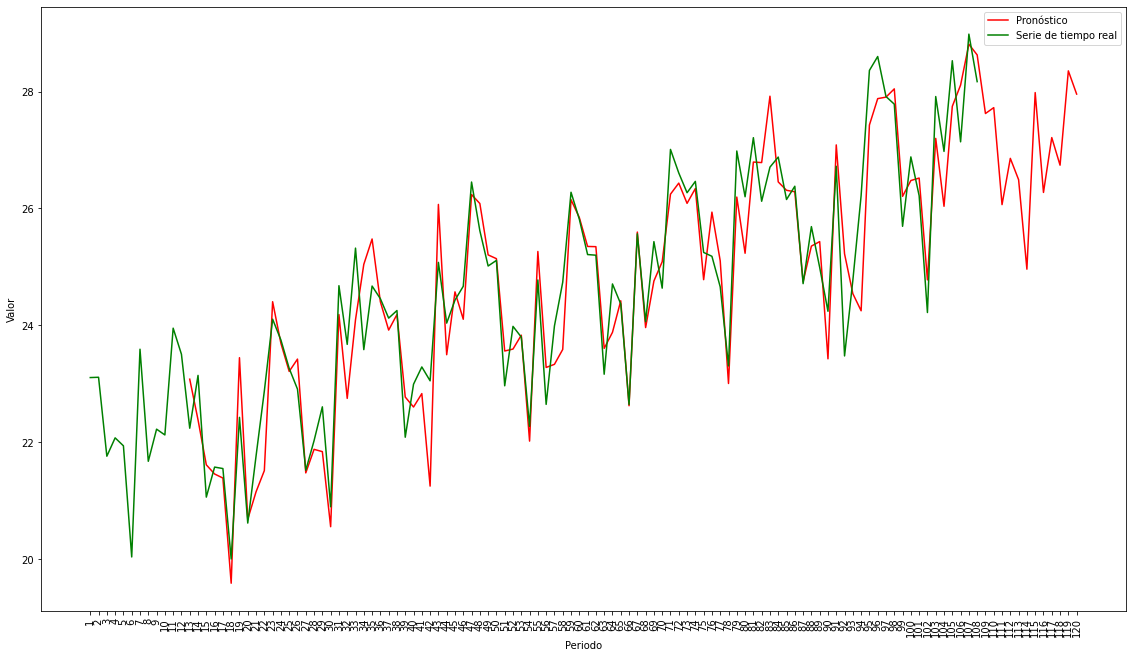

In [11]:
# Serie de ejemplo
dfserie,dfserie_errores = aplicarMetodoOptimizado("dataframe_HW.csv",12)
print(dfserie.tail())
print(dfserie_errores)
pintarGrafico(dfserie)